# Product Quality Analysis

This analysis aims to provide insights and an overview of the key factors that determine product quality. The notebook is structured into the following sections:

1. **Overview** – Introduction to the dataset and problem statement.
2. **Exploratory Data Analysis (EDA)** – Visual and statistical exploration to understand data distributions and patterns.
3. **Correlation Analysis** – Identifying relationships between features and their impact on product quality.
4. **Machine Learning Model** – Building and evaluating models to determine the most dominant features influencing product quality.

By the end of this analysis, we aim to pinpoint the most influential factors contributing to high or low product quality.


In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cinnamon-quality-classification/balanced_cinnamon_quality_dataset.csv


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Overview 

In [19]:
df=pd.read_csv("/kaggle/input/cinnamon-quality-classification/balanced_cinnamon_quality_dataset.csv")

In [20]:
df.head(15)

,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
0,H001,10.56,5.93,1.24,0.28,0.0019,0.0021,High
1,H002,11.43,5.60,1.35,0.25,0.0016,0.0039,High
2,H003,11.10,5.70,1.21,0.37,0.0013,0.0029,High
3,H004,10.90,5.76,1.47,0.27,0.0011,0.0035,High
4,H005,10.23,5.82,1.28,0.26,0.0013,0.0047,High
5,H006,10.23,6.05,1.40,0.31,0.0013,0.0027,High
6,H007,10.09,5.64,1.29,0.23,0.0017,0.0032,High
7,H008,11.30,5.86,1.36,0.36,0.0016,0.0043,High
8,H009,10.90,5.91,1.36,0.21,0.0019,0.0027,High
9,H010,11.06,5.53,1.26,0.40,0.0015,0.0022,High


In [21]:
df.isnull().sum()

Sample_ID                 0
Moisture (%)              0
Ash (%)                   0
Volatile_Oil (%)          0
Acid_Insoluble_Ash (%)    0
Chromium (mg/kg)          0
Coumarin (mg/kg)          0
Quality_Label             0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_ID               60 non-null     object 
 1   Moisture (%)            60 non-null     float64
 2   Ash (%)                 60 non-null     float64
 3   Volatile_Oil (%)        60 non-null     float64
 4   Acid_Insoluble_Ash (%)  60 non-null     float64
 5   Chromium (mg/kg)        60 non-null     float64
 6   Coumarin (mg/kg)        60 non-null     float64
 7   Quality_Label           60 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.9+ KB


In [23]:
df["Quality_Label"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

## Pairwise Relationships 

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


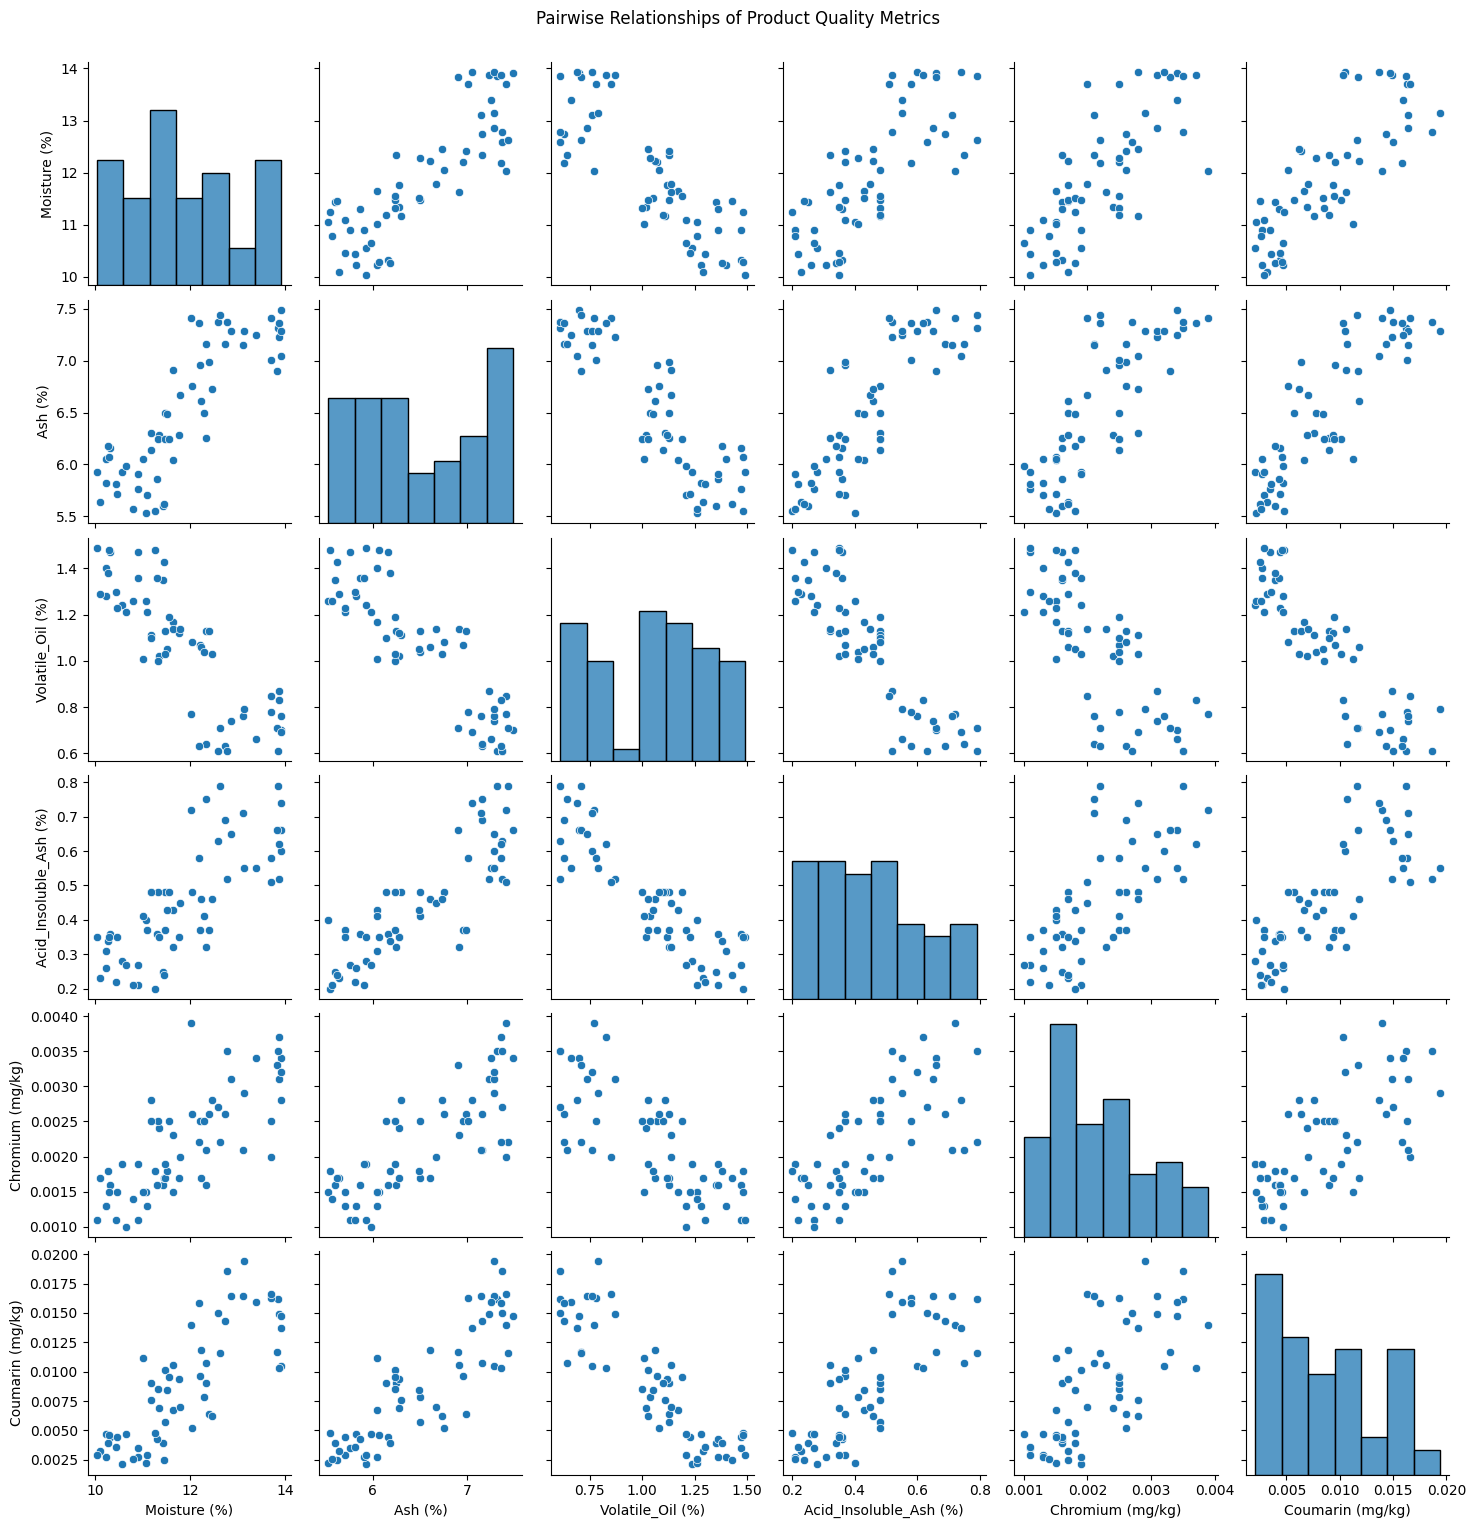

In [24]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    warnings.simplefilter("ignore", category=UserWarning)

numeric_df = df.drop(columns=['Sample_ID', 'Quality_Label'])
sns.pairplot(numeric_df)
plt.suptitle('Pairwise Relationships of Product Quality Metrics', y=1.02)
plt.show()


## Product Quality Metrics

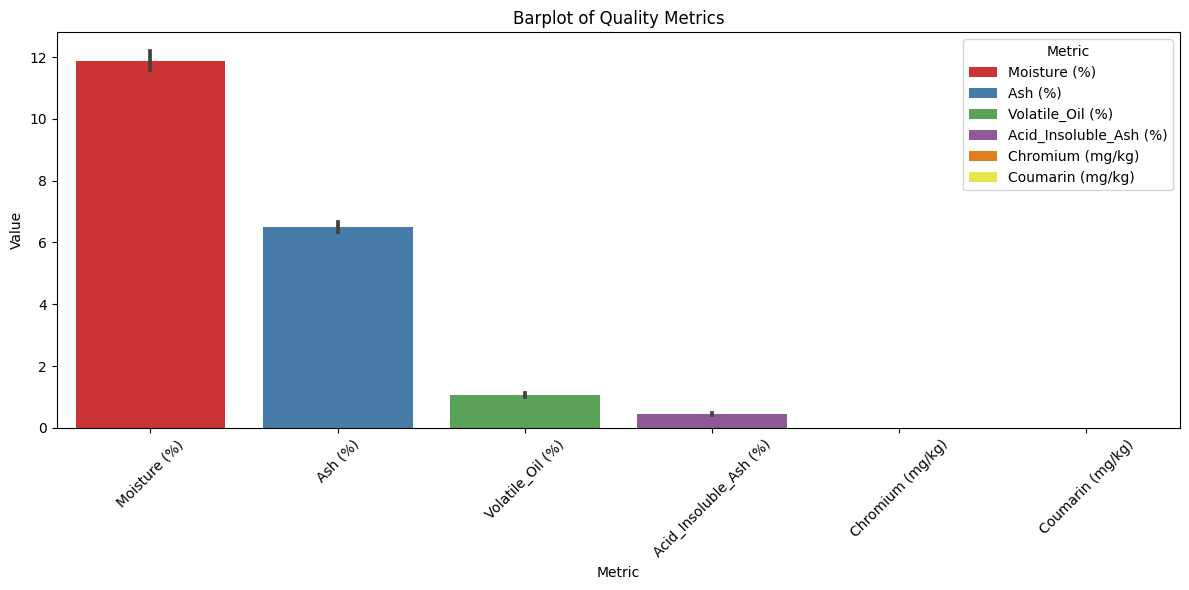

In [25]:
melted = df.drop(columns=['Sample_ID', 'Quality_Label']).melt(var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Metric', y='Value', hue='Metric', palette='Set1', dodge=False)
plt.title('Barplot of Quality Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Between the Features

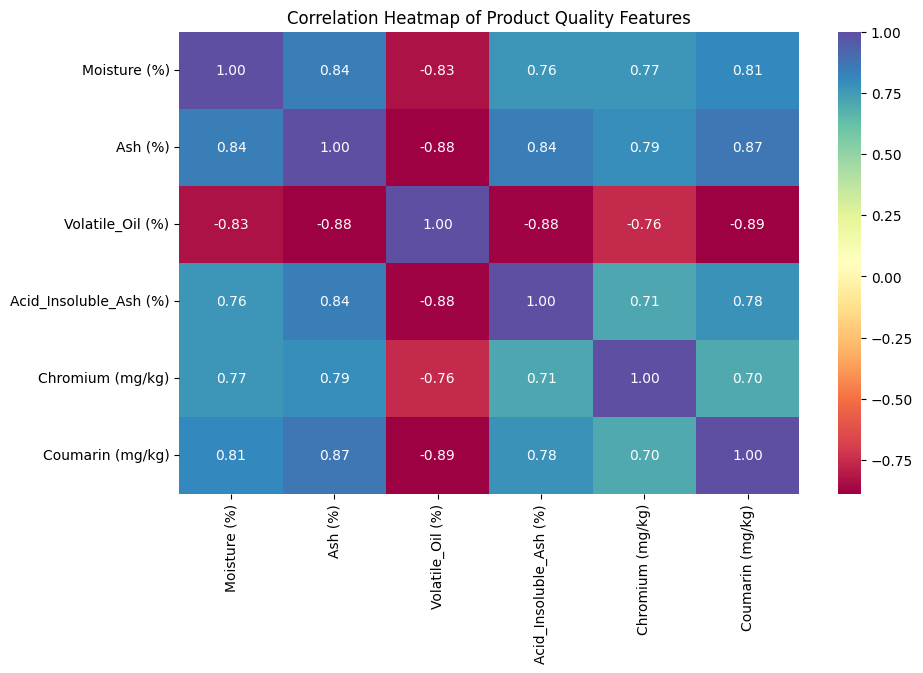

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Heatmap of Product Quality Features')
plt.show()


## ML Model Building Process

### Preprocessing Stage

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your dataframe
X = df.drop(columns=['Sample_ID', 'Quality_Label'])
y = df['Quality_Label']

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


### Training with Random Forest Classifieer

In [28]:
# Train a Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Retrieve importances 

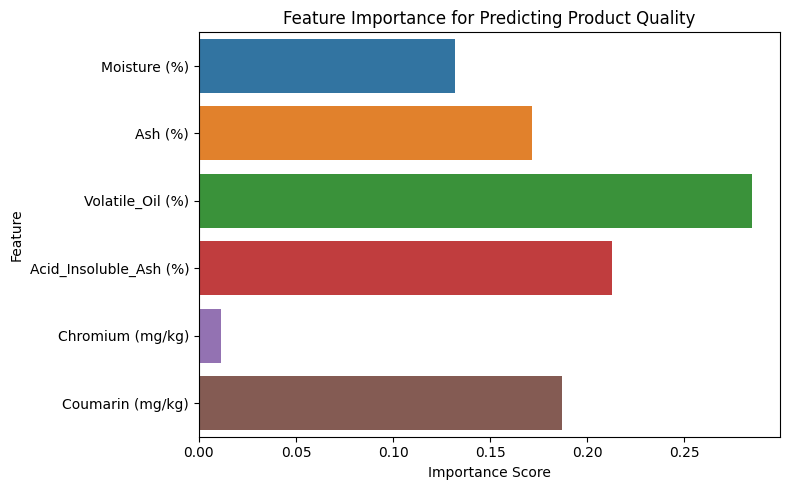

In [29]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance for Predicting Product Quality')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Evaluate the Model's Performance 

In [30]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       1.00      1.00      1.00         7
      Medium       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



### KMeans Clustering of Product Features

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)



/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


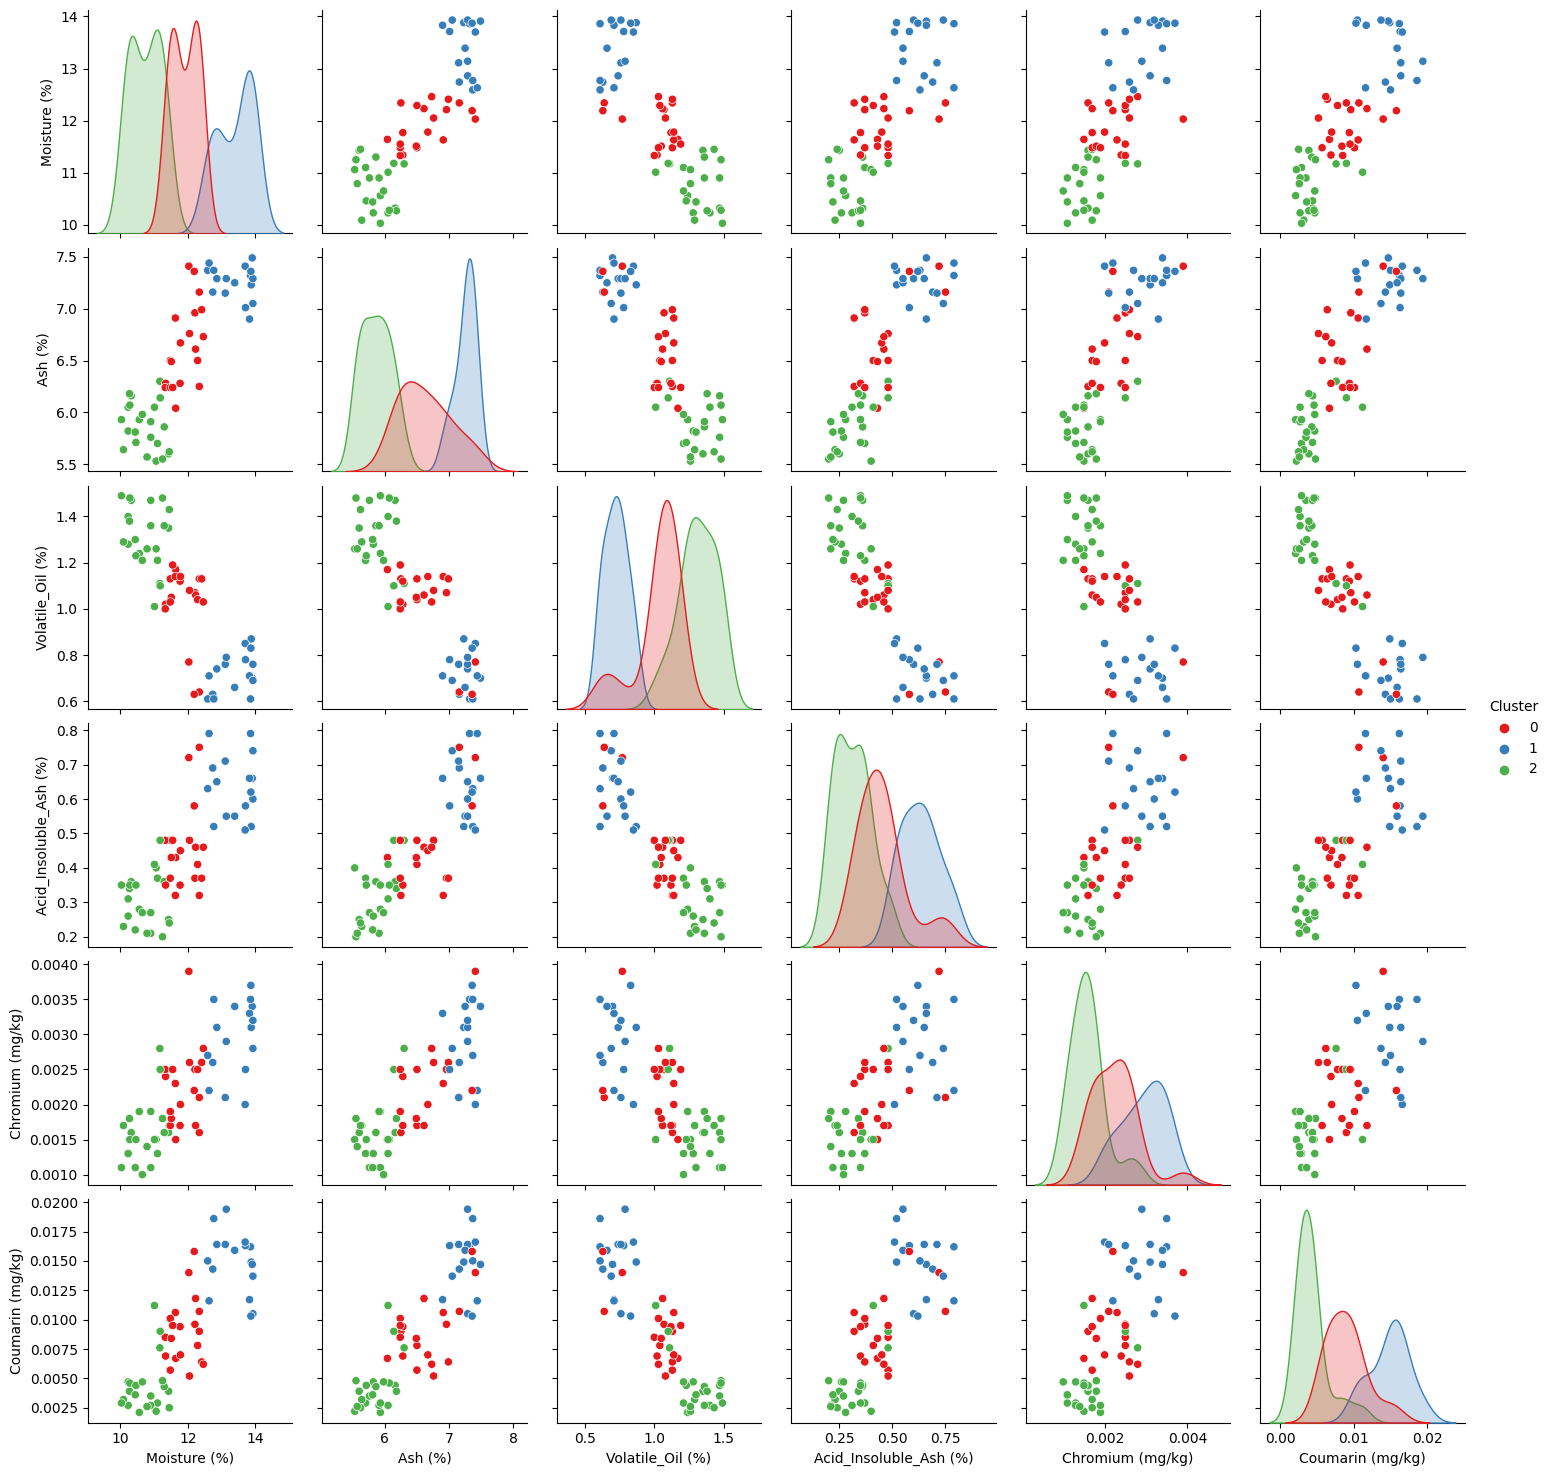

In [32]:
df['Cluster'] = clusters
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.show()